In [13]:
import numpy as np
import pandas as pd
import scipy

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

### Likelihood function

In [14]:
def likelihood_function(X, y, w): # inversed
    vec = np.array([y[i] * log(1+exp(-linear_prediction(w,X[i])))
                    + (1 - y[i]) * log(1+exp(linear_prediction(w,X[i])))
                    for i in range(X.shape[0])])
    return vec.sum()

def sigmoid(z):
    return 1 / (1 + exp(-z))

### Logistic regression model

In [31]:
def logistic_regression_fit(X, y, minimize='grad_desc', w0=None, eta=1e-2):
    """
    Returns weights that minimize logistic loss function
    """
    if (minimize == 'grad_desc'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))
        w = gradient_descent(X, y, w0, eta)[0]
        
    elif (minimize == 'st_grad_desc'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))
        w = stochastic_gradient_descent(X, y, w0, eta)[0]
        
    elif (minimize == 'scipy_minimize'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        w = scipy.optimize.minimize(lambda w: likelihood_function(data, target, w), w0).x
    else:
        #raise
        print('error: incorrect minimization method')
        return
    return w

def linear_prediction(w, X):
    """
    Returns a linear regression model prediction labels for objects in matrix 
    X using weights w:
    y_pred = (X,w)
    """
    if X.ndim == 1:
        return(np.insert(X, 0, 1).dot(w))
    else:
        n = X.shape[0]
        return np.dot(np.hstack((np.ones((n,1)),X)),w)
    
def mean_squared_error(y, y_pred):
    """
    Returns a mean squared error between real and predicted labels
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    mse = np.sum((y - y_pred)**2) / y.size
    return mse

### Gradient descent

In [16]:
def gradient_step(X, y, w, eta=0.01):
    grad = 2 * X.T.dot((1 - y) * sigmoid(X.dot(w)) - y * sigmoid(-X.dot(w)))
    w_next = w - eta * grad 
    return w_next

def gradient_descent(X, y, w0=None, eta=1e-2,
                     max_iter=1e4, min_weight_dist=1e-8):    
    X = np.array(X)
    y = np.array(y)
    if(w0 == None):
        w0 = np.zeros(X.shape[1])
        
    w = w0
    weight_dist = np.inf
    errors = []
    iter_num = 0
        
    while weight_dist > min_weight_dist and iter_num < max_iter:  
        w_next = gradient_step(X, y, w, eta)        
        errors.append(mean_squared_error(y, sigmoid(X.dot(w_next))))
        weight_dist = np.linalg.norm(w_next - w)      
        w = w_next
        iter_num += 1
    return w, errors

### Stochastic gradient descent

In [17]:
def stochastic_gradient_step(X, y, w, k, eta=0.01):
    grad = 2 * ((1 - y[k]) * sigmoid(X[k].dot(w)) - y[k] * sigmoid(-X[k].dot(w))) * X[k,:]
    w_next = w - eta * grad 
    return w_next

def stochastic_gradient_descent(X, y, w0=None, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42):    
    X = np.array(X)
    y = np.array(y)
    if(w0 == None):
        w0 = np.zeros(X.shape[1])
        
    w = w0
    weight_dist = np.inf
    errors = []
    iter_num = 0
    np.random.seed(seed)
        
    while weight_dist > min_weight_dist and iter_num < max_iter:  
        random_ind = np.random.randint(X.shape[0])
        w_next = stochastic_gradient_step(X, y, w, random_ind, eta)        
        errors.append(mean_squared_error(y, sigmoid(X.dot(w_next))))
        weight_dist = np.linalg.norm(w_next - w)      
        w = w_next
        iter_num += 1
    return w, errors

# Quality check

In [18]:
def accuracy(y, y_pred):
    return len([1 for i in range(len(y)) if y_pred[i] == y[i]]) / len(y)

#  Visualizing algorithms results

In [19]:
def plot_2f_dataset(data, labels, colors=None): 
    from numpy.random import rand
    data = np.array(data)
    labels = np.array(labels)
    n = len(set(labels))
    if(colors == None):
        colors = ListedColormap([tuple(rand(3)) for i in range(n)])
    pyplot.figure(figsize(5, 5))
    pyplot.scatter(data[:,0], data[:,1], c = labels, cmap = colors)

In [20]:
def print_result(coef, true, predict, cut = 5):
    print('w:\n',coef,'\n')
    print('true vs. prediction:\n',np.vstack((true,predict)).T[:cut],'\n...\n')
    print('accuracy: ',round(accuracy(true, predict),3))

In [21]:
def plot_for_one_feature(train_data, train_labels, w, title):
    n = 100
    x = np.linspace(train_data.min(), train_data.max(), n).reshape((n,1))
    plt.figure(figsize = (8,5))
    plt.plot(train_data, train_labels, 'o', markersize = 5)
    plt.plot(x, sigmoid(prediction(w, x)), '-', linewidth = 2)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.title(title)
    plt.show()

In [22]:
def plot_for_two_feature(data, labels, w, title, mean_std = True):
    plot_2f_dataset(data, labels)
    if mean_std:
        mean = data.mean(axis = 0)[0]
        std = data.std(axis = 0)[0]
        x = np.linspace(mean - std, mean + std, 2).reshape((2,1))
    else:    
        x = np.linspace(data.min(axis = 0)[0], data.max(axis = 0)[0], 2).reshape((2,1))
    y = - w[0] / w[2] - w[1] / w[2] * x
    plt.plot(x, y, '-', linewidth = 4)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(title)
    plt.show()

# Data

### Generate dataset

In [23]:
def normalize(X, mean_std=True):
    if mean_std:
        means, stds = X.mean(axis=0), X.std(axis=0)
        X = (X - means) / stds
    else:
        minim, maxim = data.min(axis = 0), data.max(axis = 0)
        X = (X - minim) / (maxim - minim)
    return X

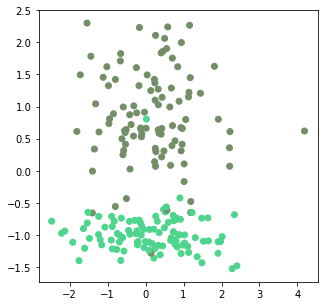

In [24]:
from sklearn import datasets
sample_size = 200
data, target = datasets.make_classification(n_samples=sample_size, n_features=2, 
                                            n_informative=1, n_redundant=0, 
                                            n_repeated=0, n_classes=2, 
                                            n_clusters_per_class=1, 
                                            weights=None, flip_y=0.01, 
                                            class_sep=1.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=None)
plot_2f_dataset(data, target)
plt.show()

### Split dataset into train & test samples

In [25]:
from sklearn import cross_validation as cross_val

train_data, test_data, \
train_labels, test_labels = cross_val.train_test_split(data, target,
                                                       test_size = 0.3)

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
print('train_data: \n',train_data[:5],'\n...\n')
print('train_labels: \n',train_labels[:5],'...')

train_data: 
 [[ 1.02638207 -1.12774521]
 [ 0.25044981  1.09921667]
 [-0.21597785 -1.11503893]
 [ 0.33557355 -1.16491047]
 [ 0.73036584 -0.95126246]] 
...

train_labels: 
 [0 1 0 0 0] ...


# Run models and output

### Numerical method using gradient descent

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # Remove the CWD from sys.path while we load stuff.


w:
 [ 12.93559836   2.7708432   21.94974037] 

true vs. prediction:
 [[ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 0.  0.]] 
...

accuracy:  0.933


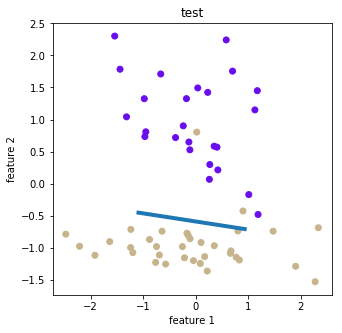

In [27]:
w = logistic_regression_fit(train_data, train_labels, 'grad_desc', eta = 0.5)

test_labels_probab = sigmoid(linear_prediction(w,test_data))
test_labels_predicted = np.round(test_labels_probab)
print_result(w,test_labels, test_labels_predicted)
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')
elif train_data.shape[1] == 2:
    #plot_for_two_feature(train_data, train_labels, w, 'train')
    plot_for_two_feature(test_data, test_labels, w, 'test')

### Numerical method using stochastic gradient descent

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # Remove the CWD from sys.path while we load stuff.


w:
 [ 3.49749115 -0.67097369  7.04534522] 

true vs. prediction:
 [[ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 0.  0.]] 
...

accuracy:  0.967


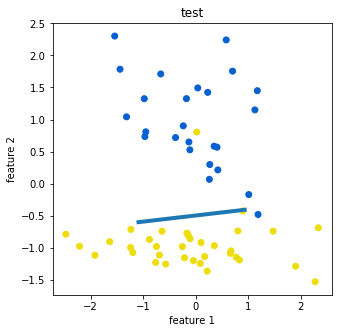

In [28]:
w = logistic_regression_fit(train_data, train_labels, 'st_grad_desc', eta=0.5)

test_labels_probab = sigmoid(linear_prediction(w,test_data))
test_labels_predicted = np.round(test_labels_probab)
print_result(w, test_labels, test_labels_predicted)
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')
elif train_data.shape[1] == 2:
    #plot_for_two_feature(train_data, train_labels, w, 'train')
    plot_for_two_feature(test_data, test_labels, w, 'test')

### Numerical method using scipy.optimize.minimize

w:
 [ 2.01714597 -0.0305482   5.37787862] 

true vs. prediction:
 [[ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 0.  0.]] 
...

accuracy:  0.967


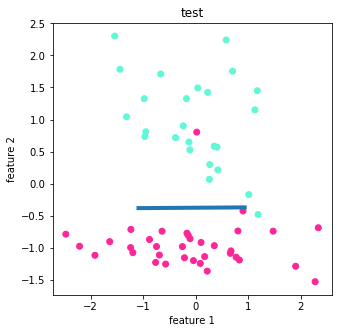

In [29]:
w = logistic_regression_fit(train_data, train_labels, 'scipy_minimize')

test_labels_probab = sigmoid(linear_prediction(w,test_data))
test_labels_predicted = np.round(test_labels_probab)
print_result(w, test_labels, test_labels_predicted)
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')
elif train_data.shape[1] == 2:
    #plot_for_two_feature(train_data, train_labels, w, 'train')
    plot_for_two_feature(test_data, test_labels, w, 'test')

### sklearn.linear_model.LogisticRegression for check

w:
 [ 1.09255194 -0.10112341  3.45743817] 

true vs. prediction:
 [[0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]] 
...

accuracy:  0.967


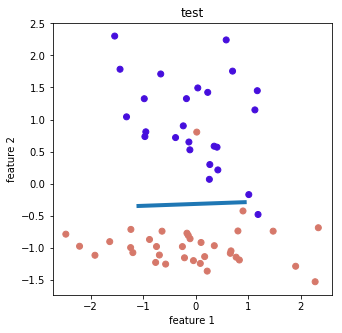

In [30]:
from sklearn import linear_model 
logistic_regressor = linear_model.LogisticRegression(penalty='l2', 
                                                     tol=1e-4,
                                                     fit_intercept=True, 
                                                     intercept_scaling=1, 
                                                     class_weight=None, 
                                                     random_state=1, 
                                                     solver='liblinear')
logistic_regressor.fit(train_data, train_labels)

w = [logistic_regressor.intercept_[0]]
w.extend(logistic_regressor.coef_[0])
w = np.array(w)
print_result(w, test_labels, logistic_regressor.predict(test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')
elif train_data.shape[1] == 2:
    #plot_for_two_feature(train_data, train_labels, w, 'train')
    plot_for_two_feature(test_data, test_labels, w, 'test')